## 일변량 양적 자료 분석

+ 표
+ 그래프
+ 기술통계량(요약통계량)

** 양적자료는 값에 대한 빈도와 백분율을 구하지 않음
  ( 데이터가 가지는 값의 종류가 많기 때문에 )
  
** 양적자료로 빈도와 백분율을 구하려면 구간별 새로운 자료를 생성하고 구함

### 양적자료 시각화 

1. 히스토그램

2. 박스플롯



In [1]:
# 데이타 읽어오기

import pandas as pd

# 인덱스가 2번 생성되기에 기존 인덱스를 인덱스로 지정
diamonds = pd.read_csv('data/diamonds.csv', index_col='Unnamed: 0')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


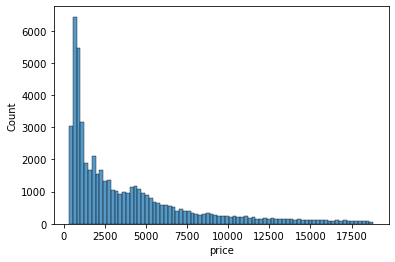

In [2]:
# 가격에 대한 그래프 그리기
import seaborn as sns                  # 데이타
import matplotlib.pyplot as plt  # 그래프 라이브러리

# plt.hist(diamonds['price']);

axes = sns.histplot(diamonds['price'], kde=False);



In [ ]:
axes = sns.boxplot(diamonds['price']);


In [ ]:
# sns.countplot(diamonds['price']);
diamonds['price'].plot(kind='bar')

### [양적자료를 질적자료로 새로 생성 ]

In [8]:
# diamonds 데이터에 gprice 컬럼 추가하기
# 0 ~ 5000 : 5000 
# 5000 ~ 10000 : 10000
# 10000 ~ 15000 : 15000
# 15000 ~ : 20000

def set_gprice(diamonds):
    gprice = 0
    if diamonds['price'] >= 0 and diamonds['price']<5000 :
        gprice = 5000
    elif diamonds['price'] >= 5000 and diamonds['price']<10000 :
        gprice = 10000
    elif diamonds['price'] >= 10000 and diamonds['price']<15000 :
        gprice = 15000
    else:
        gprice = 20000
    return gprice

diamonds['gprice'] = diamonds.apply(set_gprice,axis=1)
diamonds.tail(100)

,carat,cut,color,clarity,depth,table,price,x,y,z,gprice
53841,0.71,Good,H,VVS2,60.4,63.0,2738,5.69,5.74,3.45,5000
53842,0.80,Very Good,H,SI1,63.8,56.0,2739,5.85,5.91,3.75,5000
53843,0.71,Ideal,H,VVS1,62.0,57.0,2739,5.71,5.75,3.55,5000
53844,0.57,Ideal,E,VVS1,61.8,56.0,2739,5.33,5.35,3.30,5000
53845,0.74,Very Good,D,SI2,61.5,59.0,2740,5.79,5.82,3.57,5000
...,...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,5000
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,5000
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,5000
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,5000


In [15]:
# 명목형 데이터 
# -> 빈도수 : value_counts()
# -> 막대 그래프, 원 그래프
gprice_counts = diamonds['gprice'].value_counts()
pd.DataFrame(gprice_counts)

,gprice
5000,39213
10000,9504
15000,3567
20000,1656


<AxesSubplot:ylabel='gprice'>

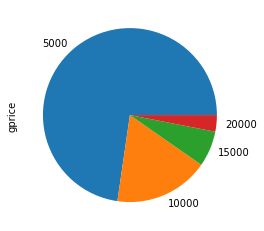

In [19]:
# gprice_counts.plot(kind='bar')
gprice_counts.plot(kind='pie')

<AxesSubplot:xlabel='count', ylabel='gprice'>

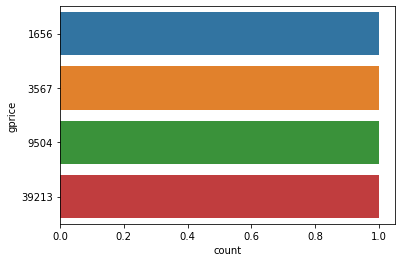

In [18]:
sns.countplot(y=gprice_counts)